In [1]:
import pandas as pd
import numpy as np
import os
from collections import Counter
import seaborn as sns
import itertools
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import textract
import re
import networkx as nx

import nltk
import nltk.corpus
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist

import gensim
from gensim.parsing.preprocessing import STOPWORDS
from gensim.parsing.preprocessing import remove_stopwords

In [2]:
#uploading the texts 
all_texts = open('all_texts.txt').read()

In [3]:
#lower casing 
text_as_string = all_texts.lower()

In [4]:
result = re.sub(r'\d+', '', text_as_string)

In [7]:
#removing punctuation
punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
text_nopunct=result.translate(punc)

In [6]:
#removing stopwords 
all_stopwords = gensim.parsing.preprocessing.STOPWORDS
new_stopword = STOPWORDS.union(set(['e','x','p','j','n','p','r', 'd', 't', 'm', 'com', 'www', 's','pp','c','l','g','s','org','b','v','doi','o','l', 'https', 'fig', 'non', 'ac', 'ox', 'oii', 'et', 'al']))
filtered_sentence = remove_stopwords(text_nopunct)

In [9]:
#tokenization
txt_tokens = word_tokenize(filtered_sentence)
words=[word.lower() for word in txt_tokens if word.isalpha()]
tok_without_sw = [word for word in words if not word.lower() in new_stopword]

In [11]:
#let's see hon many words we have
print(len(tok_without_sw))

76318


In [15]:
#Frequency Distribution Plot
fdist = FreqDist(tok_without_sw)
df_fdist = pd.DataFrame(fdist.items(), columns=['word', 'frequency'])
df_fdist

In [18]:
#Creating the dataframe of the Top 20 most frequant words
df_fdist20 = df_fdist.sort_values(['frequency'], ascending=False).head(20)
df_fdist20 

,word,frequency
3442,ai,1298
4,ethics,1164
446,ethical,819
47,data,419
626,principles,419
608,social,332
476,public,318
190,intelligence,313
373,artificial,301
2236,systems,299


Text(0.5, 1.0, 'TOP 20 frequent words which occurred the texts')

<Figure size 1440x720 with 0 Axes>

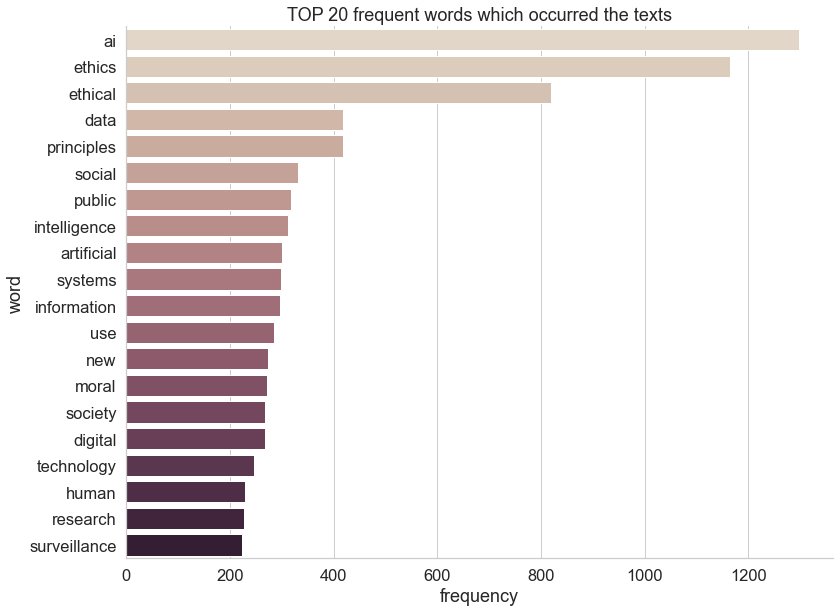

In [19]:
#visualisation of the top 20 words
plt.figure(figsize=(20,10))
sns.catplot(y="word", x="frequency", kind="bar", palette="ch:.25", data=df_fdist20, height=8.27, aspect=11.7/8.27)
plt.title('TOP 20 frequent words which occurred the texts')

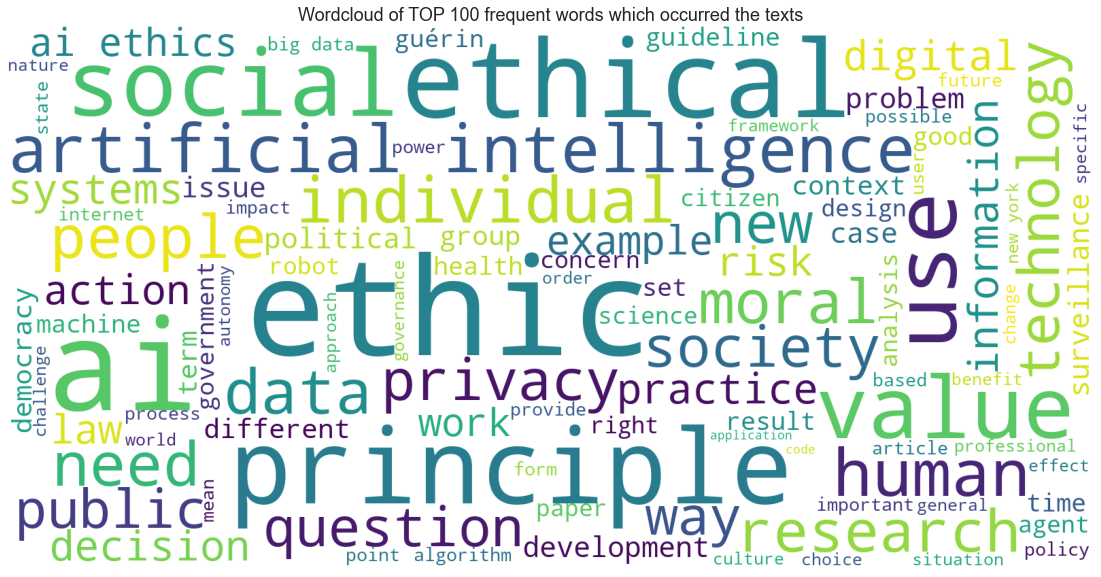

In [21]:
# using list comprehension 
listToStr= ' '.join(map(str, tok_without_sw)) 

# Create and generate a word cloud image
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=100, background_color="white", collocations=True).generate(listToStr)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Wordcloud of TOP 100 frequent words which occurred the texts')
plt.axis("off")
plt.show()

In [138]:
#transforming series to top 20 bigrams
bigrams_series = (pd.Series(nltk.ngrams(tok_without_sw, 2)).value_counts())[:20]

In [139]:
#creating the dataframe
bigrams_top = pd.DataFrame(bigrams_series.sort_values(ascending=False))
bigrams_top = bigrams_top.reset_index().rename(columns={'index': 'bigrams', 0:'counts'})
bigrams_top

,bigrams,counts
0,"(artificial, intelligence)",232
1,"(ai, ethics)",141
2,"(big, data)",88
3,"(new, york)",80
4,"(machine, learning)",70
5,"(ai, systems)",62
6,"(university, press)",58
7,"(surveillance, culture)",51
8,"(ethics, ai)",50
9,"(public, administration)",49


Text(0.5, 1.0, 'TOP 20 pair of words which occurred the texts')

<Figure size 1440x720 with 0 Axes>

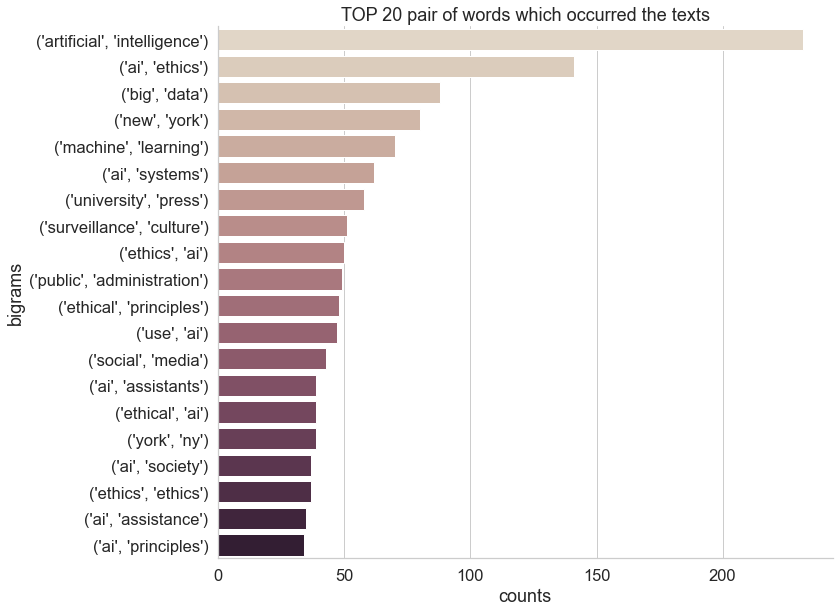

In [141]:
#visualisation of the top 20 bigrams
plt.figure(figsize=(20,10))
sns.catplot(x = 'counts' , y='bigrams', kind="bar", palette="ch:.25", data=bigrams_top, height=8.27, aspect=11.7/8.27)
plt.title('TOP 20 pair of words which occurred the texts')

In [38]:
#creating the final dataframe with 500 bigrams for the network analysis
bigrams_ser = (pd.Series(nltk.ngrams(tok_without_sw, 2)).value_counts())[:500]

In [39]:
bigrams_df = pd.DataFrame({'bigram':bigrams_ser.index, 'count':bigrams_ser.values})
bigrams_df

,bigram,count
0,"(artificial, intelligence)",232
1,"(ai, ethics)",141
2,"(big, data)",88
3,"(new, york)",80
4,"(machine, learning)",70
...,...,...
495,"(ai, agents)",6
496,"(implicit, ethical)",6
497,"(social, political)",6
498,"(journal, ethics)",5


In [40]:
#transforming to csv
bigrams_df.to_csv('data_for_network.tsv', index=False)